## Logistic Regression
logistic regression is used for classification  problems. eg (is human or not, is men or women)

In [64]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [65]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [67]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [69]:
# pre process the data

# remove Deck column
df.drop('deck', axis=1, inplace=True)


In [76]:
# impute missing values in age and fare 
df['age'].fillna(df['age'].median())



0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [74]:
# impute missing values in  embark and embark_town
df['embarked'].fillna(df['embarked'].mode()[0])


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [73]:
df['embark_town'].fillna(df['embark_town'].mode()[0])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [77]:
# encode the categorical variable using for loop where object and category datatypes

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [78]:
# X and y column
X = df.drop('survived', axis=1)
y = df['survived']

In [79]:
# tarin test split the data
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [80]:
model = LogisticRegression() # call the model 

In [81]:
model.fit(X_train,y_train) # train the model

c:\Users\Bilal\miniconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
# Predict the values
y_predict = model.predict(X_test)

In [83]:
# Check the prediction
print('Prediction: ', y_predict)
print('Actual: ', y_test)
print()

Prediction:  [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]
Actual:  709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64



In [84]:
model.predict([[3,1,22,1,0,7.25,2,2,1,1,0,0,0]])

c:\Users\Bilal\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [85]:
# evaluate the model
print('accuracy_score: ', accuracy_score(y_test, y_test))
print('recall_score: ', recall_score(y_test, y_test))
print('precision_score: ', precision_score(y_test, y_test))
print('F1 Score: ', f1_score(y_test, y_test))
print('confusion_matrix: \n', confusion_matrix(y_test, y_test))
print('classification_report: ', classification_report(y_test, y_test))

accuracy_score:  1.0
recall_score:  1.0
precision_score:  1.0
F1 Score:  1.0
confusion_matrix: 
 [[105   0]
 [  0  74]]
classification_report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

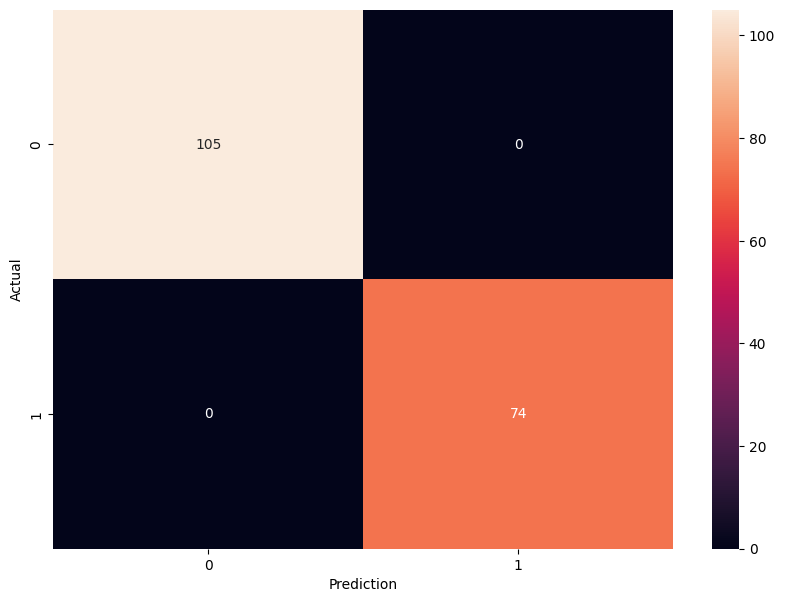

In [86]:
# Plot yhe Confussion Matrix 
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_test), annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [87]:
# save the model 
import pickle
pickle.dump(model, open('./saved_Model/model_logistic_regression.pkl', 'wb'))


In [88]:
# run the pickle model file 
loaded_model = pickle.load(open('./saved_Model/model_logistic_regression.pkl', 'rb'))

In [89]:
print("Prediction using loaded model: ", loaded_model.predict([[3,1,22,1,0,7.25,2,2,1,1,0,0,0]]))

Prediction using loaded model:  [0]


c:\Users\Bilal\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
